# Analisis Data Penjualan

**Load Lybrary**

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

**Open Excel File**

In [2]:
df = pd.read_excel('Online Retail.xlsx', engine='openpyxl')

**Jumlah Baris dan Kolom**

In [6]:
df.shape

(541909, 8)

**Tampilkan 5 data teratas**

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Analisis Produk

**Distribusi berdasarkan jumlah pesanan(order)**

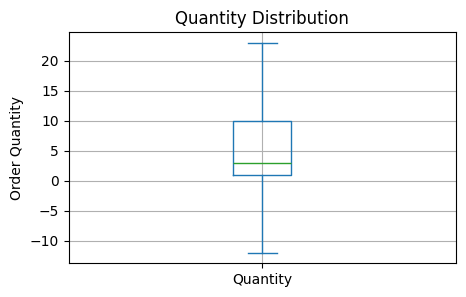

In [9]:
ax = df['Quantity'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(5, 3)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()

**Rincian Data berdasarkan jumlah**

In [10]:
pd.DataFrame(df['Quantity'].describe())

,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


**Jumlah Pesanan Berdasarkan Tanggal**

In [11]:
df.loc[df['Quantity'] > 0].shape

(531285, 8)

In [12]:
df.shape

(541909, 8)

In [13]:
df = df.loc[df['Quantity']>0]

In [14]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('ME').nunique()

In [15]:
monthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: ME, Name: InvoiceNo, dtype: int64

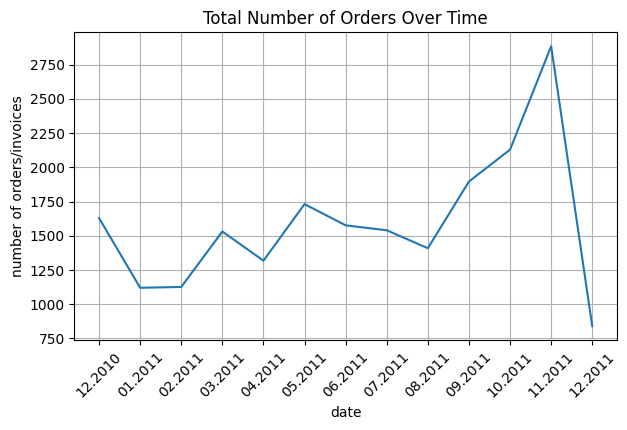

In [17]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(7,4),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_orders_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_orders_df.index], 
    rotation=45
)

plt.show()

**Total Penjualan Berdasarkan Tanggal**